<a href="https://colab.research.google.com/github/Ismail-Armutcu/Algorithms-for-Interactive-Sytems/blob/main/MMI513_PA5_PathFinding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 7: Path finding**

- In this notebook, we will explore several algorithms for finding a path between two points in a graph or map. We will cover Douglas-Peucker algorithm, Seidel's algorithm, and Hertel-Mehlhorn Convex Partitioning.

- We will be leaving the implementation of Algorithm A* as a programming assignment for you to complete. This will allow you to put your knowledge and skills to the test and reinforce your understanding of the concepts we've covered.

## Preamble

In [709]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import find_contours
import math
import scipy.spatial as spat
from shapely import MultiPoint, Polygon, LineString
from shapely.ops import triangulate
import random


In [710]:
def plotpoly(poly, flag=True):
    fig, ax = plt.subplots()
    if flag:
      ax.plot(poly[:, 1], poly[:, 0], 'o-r', linewidth=2)
    else:
      ax.plot(poly[:, 0], poly[:, 1], 'o-r', linewidth=2)
      ax.plot([poly[-1, 0], poly[0, 0]], [poly[-1, 1], poly[0,1]], 'o-r', linewidth=2)
    return ax

# Algorithm $A^{*}$

- We will use the ```shapely``` package here to make things a little easier.
- The code below includes functions for converting a convex partition into a graph that can be used in path-finding.
- The implementation and testing of the Algorithm $A^*$ is the programming assignment


In [711]:
# Triangulation is carried out in the convex hull and not within the polygon.
# We will select triangles within the polygon
def triangulate_within(polygon):
    return [triangle for triangle in triangulate(polygon) if triangle.within(polygon)]

def getgraph(points): # We are not doing any type-checking, which is not good!
  polygon = Polygon(points)
  # trig = triangulate(roompoly)
  trig = triangulate_within(polygon)
  print(trig[0])
  vertices = []
  edges = []
  for ply in trig:
    neighs = ply.intersection(trig)
    cp1 = ply.centroid
    vertices.append(cp1)
    ln = len(neighs)
    for ind in range(ln):
      neig = neighs[ind]
      # Two triangles are neighbours only when their intersection is a LineString
      if type(neig) == LineString:
        cp2 = trig[ind].centroid
        edges.append(LineString([cp1, cp2])) # We are adding all edges twice so we will have to eliminate them at the end
  # Eliminate the duplicates now
  edgeiter = edges.copy()
  for edge in edgeiter:
    if len(np.where(edge.equals(edges)==True)[0]) > 1:
      edges.remove(edge)

  v = []
  for vertice in vertices:
    v.append((round(vertice.x,2), round(vertice.y,2)))
  e = []
  for edge in edges:
    p1x = round(edge.coords[0][0],2)
    p1y = round(edge.coords[0][1],2)
    p2x = round(edge.coords[1][0],2)
    p2y = round(edge.coords[1][1],2)
    e.append(((p1x,p1y),(p2x,p2y)))
  return v, e

def plotgraph(vertices, edges, flag = True):
  x, y = [], []
  for v in vertices:
    x.append(v[0])
    y.append(v[1])

  if(flag):
    plt.scatter(np.array(x), np.array(y))
    plt.axis('equal')  # Equal aspect ratio
    for e in edges:
      plt.plot([e[0][0], e[1][0]], [e[0][1], e[1][1]], 'm')
  else:
     plt.scatter(np.array(x), np.array(y))
     for e in edges:
      plt.plot([e[0][0], e[1][0]], [e[0][1], e[1][1]], 'y')

def plotPath(vertices,edges,start,end):
  x, y = [], []
  for v in vertices:
    x.append(v[0])
    y.append(v[1])
    plt.scatter(np.array(x), np.array(y))
    plt.axis('equal')  # Equal aspect ratio
    for e in edges:
      plt.plot([e[0][0], e[1][0]], [e[0][1], e[1][1]], 'y')
    plt.text(s[0], s[1], 'Start', verticalalignment='bottom', horizontalalignment='right', color='blue')
    plt.text(r[0], r[1], 'End', verticalalignment='bottom', horizontalalignment='right', color='green')



## **Testing code** ✅

POLYGON ((0 7, 0 0, 3 2, 0 7))
edge ((2.0, 4.67), (1.0, 3.0))
edge ((2.0, 6.33), (2.0, 4.67))
edge ((10.33, 4.0), (8.67, 6.33))
edge ((4.33, 0.67), (4.67, 1.33))
edge ((2.0, 0.67), (1.0, 3.0))
edge ((3.33, 3.0), (2.0, 4.67))
edge ((4.0, 3.0), (4.67, 1.33))
edge ((4.0, 3.0), (3.33, 3.0))
edge ((5.0, 4.0), (4.0, 3.0))
edge ((6.33, 3.0), (5.0, 4.0))
edge ((8.67, 2.33), (10.33, 4.0))
edge ((8.67, 2.33), (6.33, 3.0))
edge ((8.67, 0.67), (8.67, 2.33))
Vertice (1.0, 3.0)
Vertice (2.0, 4.67)
Vertice (2.0, 6.33)
Vertice (8.67, 6.33)
Vertice (10.33, 4.0)
Vertice (4.67, 1.33)
Vertice (4.33, 0.67)
Vertice (2.0, 0.67)
Vertice (3.33, 3.0)
Vertice (4.0, 3.0)
Vertice (5.0, 4.0)
Vertice (6.33, 3.0)
Vertice (8.67, 2.33)
Vertice (8.67, 0.67)


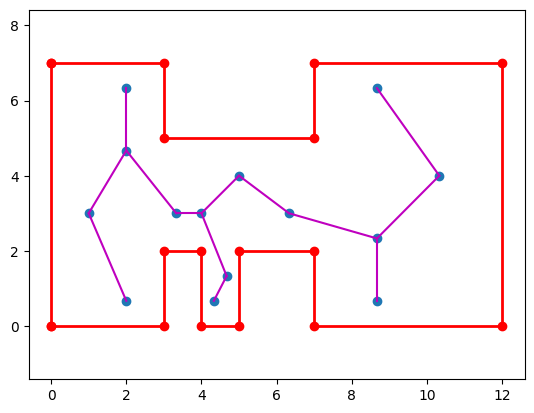

In [712]:
simproom = np.array([[0,0], [3,0], [3,2], [4,2], [4,0], [5,0], [5,2], [7,2], [7,0], [12,0], [12,7], [7,7], [7,5], [3,5], [3, 7], [0,7]])
vert_room = [(0,0),(0,7),(3,7),(3,5),(7,5),(7,7),(12,7),(12,0),(7,0),(7,2),(5,2),(5,0),(4,0),(4,2),(3,2),(3,0)]
edges_room = [[ (0,0,) , (0,7)],[(0,7) , (3,7)],[ (3,7) , (3,5)],[ (3,5) , (7,5)],[ (7,5) , (7,7)],[ (7,7) , (12,7)],[ (12,7) , (12,0)],[ (12,0) , (7,0)]
         ,[ (7,0) , (7,2)],[ (7,2) , (5,2)],[ (5,2) , (5,0)],[ (5,0) , (4,0)],[ (4,0) , (4,2)],[ (4,2) , (3,2)],[ (3,2) , (3,0)],[ (3,0) , (0,0)]]
vertices, edges= getgraph(simproom)

#plotpoly(simproom, False)
#plotgraph(vertices, edges)


for edge in edges:
  print("edge",edge)


for vertice in vertices:
  print("Vertice",vertice)

class weightMatrix:
    def __init__(self,vertices):
      self.vertices = vertices
      self.matrix = []
      for i in range(len(vertices)):
        self.matrix.append([np.inf]*len(vertices))

    def __getitem__(self, index):
        s,v = index
        return self.matrix[self.vertices.index(s)][self.vertices.index(v)]

    def __setitem__(self, index, value):
        s,v = index
        self.matrix[self.vertices.index(s)][self.vertices.index(v)] = value

#Heuristic measure takes the max of the vertical
#and horizontal distance to goal vertex
def h(v,r):
  return max(abs(r[0]-v[0]),abs(r[1]-v[1]))

#Weight of and edge in manhattan metric
def weight(v,u):
  return abs(v[0]-u[0])+ abs(v[1]-u[1])

def getSuccessors(selectedVertice,edges,vertices):
  successorList = []
  for e in edges:
    if(e[0] == selectedVertice and e[1] in vertices):
      if(not(e[1] in successorList)):
        successorList.append(e[1])
    elif(e[1] == selectedVertice and e[0] in vertices):
      if(not(e[0] in successorList)):
        successorList.append(e[0])

  return successorList


plotpoly(simproom, False)
plotgraph(vertices, edges)



A* Algo

selectedVertice == s error
Result len: 14 {(1.0, 3.0): (2.0, 4.67), (2.0, 4.67): (3.33, 3.0), (2.0, 6.33): (2.0, 4.67), (8.67, 6.33): (10.33, 4.0), (10.33, 4.0): (8.67, 2.33), (4.67, 1.33): (4.0, 3.0), (4.33, 0.67): (4.67, 1.33), (2.0, 0.67): (1.0, 3.0), (3.33, 3.0): (4.0, 3.0), (4.0, 3.0): (3.33, 3.0), (5.0, 4.0): (4.0, 3.0), (6.33, 3.0): (5.0, 4.0), (8.67, 2.33): (6.33, 3.0), (8.67, 0.67): (8.67, 2.33)}
[(8.67, 6.33), (10.33, 4.0), (8.67, 2.33), (6.33, 3.0), (5.0, 4.0), (4.0, 3.0), (3.33, 3.0)]


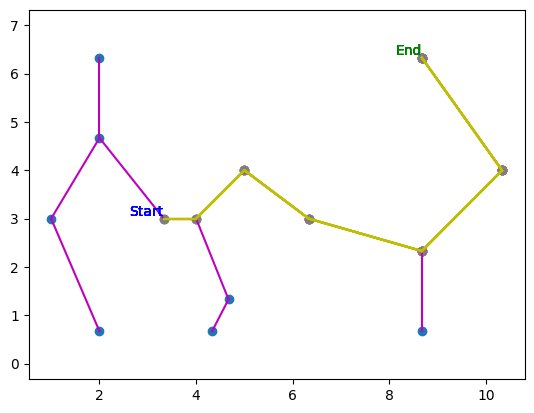

In [713]:
def aStar(vertices,edges,s,r):
  g = weightMatrix(vertices) #function g(s->v)
  S = []
  pi = {} #Mapping pi: V -> V
  for v in vertices:
    pi[v] = None
    g[s,v] = np.inf
  g[s, s] = 0
  S.append(s)
  g[s,r] = h(s,r) ## Precalculate bu mu?
  selectedVertice = s
  while len(S) != 0:
    minWeight = np.inf
    for vPrime in S:
      if(vPrime != s):
        if((g[s,vPrime]+ h(vPrime,r) )< minWeight ):
          minWeight = g[s,vPrime]+ h(vPrime,r)
          selectedVertice = vPrime


    if(selectedVertice == s):
      print("selectedVertice == s error")
    elif(selectedVertice == r and g[selectedVertice,r]< np.inf):
      return pi



    if(selectedVertice in S):
       S.pop(S.index(selectedVertice))

    for u in getSuccessors(selectedVertice,edges,vertices):
      if(pi[u] == None):
        if(not (u in S)):
          S.append(u)
        g[s,u] = g[s,selectedVertice] + weight(selectedVertice,u)
        pi[u] = selectedVertice
        g[u,r] = h(u,r)



      elif((u in S) and ((g[s,selectedVertice] + weight(selectedVertice,u)) < g[s,u])):
        if(not (u in S)):
          S.append(u)
        g[s,u] = g[s,selectedVertice] + weight(selectedVertice,u)
        pi[u] = selectedVertice
        g[u,r] = h(u,r)




s = (3.33, 3.0)
r = (8.67, 6.33)
res = aStar(vertices,edges,s,r)
print("Result len:",len(res),res)

prev = res[r]
steps = []
steps.append(r)
steps.append(prev)
while(prev != s):
  prev = res[prev]
  steps.append(prev)
print(steps)
travelledEdges = []
for i in range(len(steps)-1):
  travelledEdges.append(((steps[i]),(steps[i+1])))


plotgraph(vertices, edges)
plotPath(steps,travelledEdges,s,r)






selectedVertice == s error
{(0, 0): (3, 0), (0, 7): (0, 0), (3, 7): (0, 7), (3, 5): (3, 7), (7, 5): (3, 5), (7, 7): (7, 5), (12, 7): (7, 7), (12, 0): (7, 0), (7, 0): (7, 2), (7, 2): (5, 2), (5, 2): (5, 0), (5, 0): (4, 0), (4, 0): (4, 2), (4, 2): (3, 2), (3, 2): (3, 0), (3, 0): (0, 0)}
[(12, 7), (7, 7), (7, 5), (3, 5), (3, 7), (0, 7), (0, 0)]


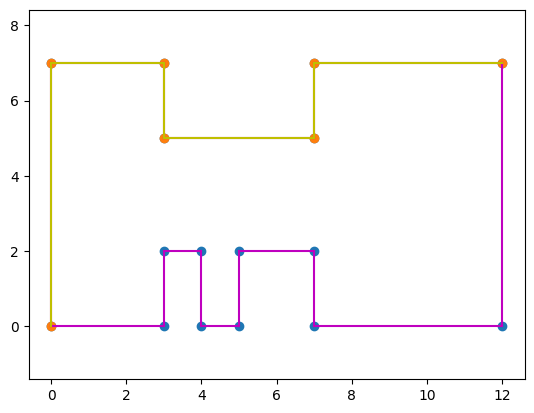

In [714]:
vertices = [(0,0),(0,7),(3,7),(3,5),(7,5),(7,7),(12,7),(12,0),(7,0),(7,2),(5,2),(5,0),(4,0),(4,2),(3,2),(3,0)]
edges = [[ (0,0,) , (0,7)],[(0,7) , (3,7)],[ (3,7) , (3,5)],[ (3,5) , (7,5)],[ (7,5) , (7,7)],[ (7,7) , (12,7)],[ (12,7) , (12,0)],[ (12,0) , (7,0)]
         ,[ (7,0) , (7,2)],[ (7,2) , (5,2)],[ (5,2) , (5,0)],[ (5,0) , (4,0)],[ (4,0) , (4,2)],[ (4,2) , (3,2)],[ (3,2) , (3,0)],[ (3,0) , (0,0)]]

plotgraph(vertices, edges)

s = (0, 0)
r = (12, 7)
res = aStar(vertices,edges,s,r)
print(res)

prev = res[r]
steps = []
steps.append(r)
steps.append(prev)
while(prev != s):
  prev = res[prev]
  steps.append(prev)

travelledEdges = []
for i in range(len(steps)-1):
  travelledEdges.append(((steps[i]),(steps[i+1])))


print(steps)
plotgraph(steps, travelledEdges,False)

POLYGON ((0 7, 0 0, 3 2, 0 7))
Result len: 14 {(1.0, 3.0): (2.0, 4.67), (2.0, 4.67): (3.33, 3.0), (2.0, 6.33): (2.0, 4.67), (8.67, 6.33): (10.33, 4.0), (10.33, 4.0): (8.67, 2.33), (4.67, 1.33): (4.0, 3.0), (4.33, 0.67): (4.67, 1.33), (2.0, 0.67): (1.0, 3.0), (3.33, 3.0): None, (4.0, 3.0): (3.33, 3.0), (5.0, 4.0): (4.0, 3.0), (6.33, 3.0): (5.0, 4.0), (8.67, 2.33): (6.33, 3.0), (8.67, 0.67): (8.67, 2.33)}
[(8.67, 6.33), (10.33, 4.0), (8.67, 2.33), (6.33, 3.0), (5.0, 4.0), (4.0, 3.0), (3.33, 3.0)]


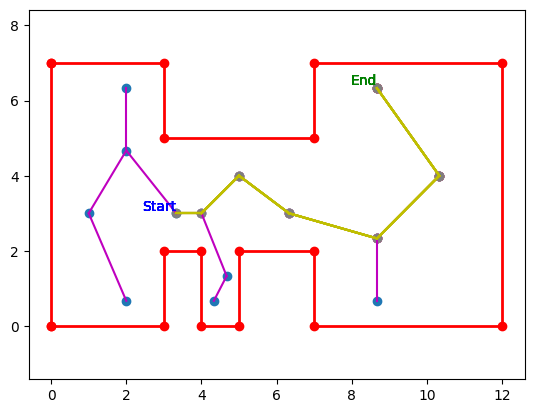

In [715]:
def dijsktra(vertices,edges,s,r):
  g = weightMatrix(vertices) #function g(s->v)
  Q = []
  prev = {} #Mapping pi: V -> V
  for v in vertices:
    g[s,v] = np.inf
    prev[v] = None
    Q.append(v)
  g[s,s] = 0
  u = s
  while(len(Q) !=0):
    minWeight = np.inf
    for vPrime in Q:
      if(vPrime != s):
        if( g[s,vPrime]< minWeight ):
          minWeight = g[s,vPrime]
          u = vPrime

    if(u == r and g[u,r]< np.inf):
      return prev
    if(u in Q):
      Q.pop(Q.index(u))

    for v in getSuccessors(u,edges,Q):
      alt = g[s,u] +  np.sqrt((u[0] - v[0])**2 + (u[1] - v[1])**2)
      if alt < g[s,v] :
        g[s, v] = alt
        prev[v] = u

  return prev



simproom = np.array([[0,0], [3,0], [3,2], [4,2], [4,0], [5,0], [5,2], [7,2], [7,0], [12,0], [12,7], [7,7], [7,5], [3,5], [3, 7], [0,7]])
vert_room = [(0,0),(0,7),(3,7),(3,5),(7,5),(7,7),(12,7),(12,0),(7,0),(7,2),(5,2),(5,0),(4,0),(4,2),(3,2),(3,0)]
edges_room = [[ (0,0,) , (0,7)],[(0,7) , (3,7)],[ (3,7) , (3,5)],[ (3,5) , (7,5)],[ (7,5) , (7,7)],[ (7,7) , (12,7)],[ (12,7) , (12,0)],[ (12,0) , (7,0)]
         ,[ (7,0) , (7,2)],[ (7,2) , (5,2)],[ (5,2) , (5,0)],[ (5,0) , (4,0)],[ (4,0) , (4,2)],[ (4,2) , (3,2)],[ (3,2) , (3,0)],[ (3,0) , (0,0)]]
vertices, edges= getgraph(simproom)




s = (3.33, 3.0)
r = (8.67, 6.33)
res = dijsktra(vertices,edges,s,r)
print("Result len:",len(res),res)

prev = res[r]
steps = []
steps.append(r)
steps.append(prev)
while(prev != s):
  prev = res[prev]
  steps.append(prev)
print(steps)
travelledEdges = []
for i in range(len(steps)-1):
  travelledEdges.append(((steps[i]),(steps[i+1])))

plotpoly(simproom, False)
plotgraph(vertices, edges)
plotPath(steps,travelledEdges,s,r)





POLYGON ((-0.9500908205098016 0.5485351909759268, -0.963638067863248 0.258206042079845, -0.6649657781074318 0.664965778107432, -0.9500908205098016 0.5485351909759268))


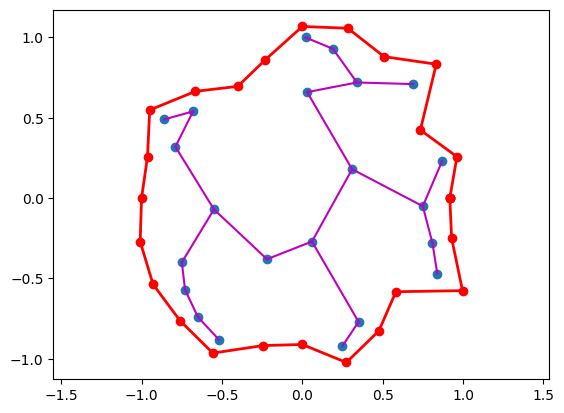

In [716]:
##Cited from https://stackoverflow.com/questions/50731785/create-random-shape-contour-using-matplotlib
## OriolAbril answer
def createRandomContour(n = 8, r = 0.2):
  n = 8 # Number of possibly sharp edges
  r = .2 # magnitude of the perturbation from the unit circle,
  # should be between 0 and 1
  N = n*3+1 # number of points in the Path
  # There is the initial point and 3 points per cubic bezier curve. Thus, the curve will only pass though n points, which will be the sharp edges, the other 2 modify the shape of the bezier curve

  angles = np.linspace(0,2*np.pi,N)
  verts = np.stack((np.cos(angles),np.sin(angles))).T*(2*r*np.random.random(N)+1-r)[:,None]
  verts[-1,:] = verts[0,:] # Using this instad of Path.CLOSEPOLY avoids an innecessary straight line
  return verts

shape = createRandomContour(1000,0.3)
plotpoly(shape,False)
vertices, edges= getgraph(shape)
plotgraph(vertices, edges)



# Programming Assignment #5

## **Fall 2023/24 Semester**

Implement both Dijkstra and $A^*$ algorithms. Using the same input compare their computational efficiencies.

1. Implement both of the algorithms
2. Give both the same problem domains, converted to a graph with appropriate processing
3. Run the algorithms multiple times for randomly selected start-end nodes and log the running time (e.g. 10 time for each randomly selected pair for 10 random selections)
4. Plot the average running time and the dispersion of the running time.
5. Comment on which algorithm works faster and why.

**GRADING:**
1. Algorithm implementation (40%):
  - Dijkstra algorithm is correctly implemented (20%)
  - $A^*$ algorithm is correctly implemented (20%)
2. Problem domain conversion (20%):
  - The input problem domain is converted to a graph with appropriate processing (20%)
3. Algorithm comparison (30%):
  - The algorithms are run multiple times for randomly selected start-end nodes (10%)
  - The running time is correctly logged (10%)
  - The average running time is plotted (5%)
  - The dispersion of the running time is plotted (5%)
4. Analysis (10%):
  - The analysis includes a comment on which algorithm works faster (5%)
  - The analysis includes a reason why the algorithm works faster (5%)

**Notes:**
1. You are free to use chatGPT for help. However, you should not use code generated by chatGPT directly and you should mention which part of the code is chatGPT in the comments. Your code will be checked for verbatim copying from chatGPT.
2. You are not allowed to use external modules/libraries in your implementations except those already in the notebook, but you can use them for testing your code.
3. You will upload your submission as a Python notebook to ODTUClass.

(c) Huseyin Hacihabiboglu, 2022-2024